In [1]:
import malaya

## Explanation

Positive subjectivity: based on or influenced by personal feelings, tastes, or opinions. Can be a positive or negative sentiments.

Negative subjectivity: based on a report or a fact. Can be a positive or negative sentiments.

In [2]:
negative_text = 'Kerajaan negeri Kelantan mempersoalkan motif kenyataan Menteri Kewangan Lim Guan Eng yang hanya menyebut Kelantan penerima terbesar bantuan kewangan dari Kerajaan Persekutuan. Sedangkan menurut Timbalan Menteri Besarnya, Datuk Mohd Amar Nik Abdullah, negeri lain yang lebih maju dari Kelantan turut mendapat pembiayaan dan pinjaman.'
positive_text = 'kerajaan sebenarnya sangat bencikan rakyatnya, minyak naik dan segalanya'

## Load multinomial model

In [3]:
model = malaya.subjective.multinomial()
print(model.predict(positive_text,get_proba=True))
print(model.predict(negative_text,get_proba=True))
model.predict_batch([negative_text,negative_text],get_proba=True)

{'negative': 0.46203835811002486, 'positive': 0.5379616418899767}
{'negative': 0.8698758314042119, 'positive': 0.13012416859579023}


[{'negative': 0.8698758314042119, 'positive': 0.13012416859579023},
 {'negative': 0.8698758314042119, 'positive': 0.13012416859579023}]

## Load xgb model

In [4]:
model = malaya.subjective.xgb()
print(model.predict(positive_text,get_proba=True))
print(model.predict(negative_text,get_proba=True))
model.predict_batch([negative_text,negative_text],get_proba=True)

{'negative': 0.4284472, 'positive': 0.5715528}
{'negative': 0.9249991, 'positive': 0.07500088}


[{'negative': 0.9249991, 'positive': 0.07500088},
 {'negative': 0.9249991, 'positive': 0.07500088}]

## List available deep learning models

In [5]:
malaya.subjective.available_deep_model()

['fast-text',
 'hierarchical',
 'bahdanau',
 'luong',
 'bidirectional',
 'bert',
 'entity-network']

In [6]:
for i in malaya.subjective.available_deep_model():
    print('Testing %s model'%(i))
    model = malaya.subjective.deep_model(i)
    print(model.predict(negative_text))
    print(model.predict_batch([negative_text, positive_text]))
    print()

Testing fast-text model
{'negative': 0.9999857, 'positive': 1.4311945e-05}
[{'negative': 0.99998176, 'positive': 1.8284805e-05}, {'negative': 0.6197021, 'positive': 0.3802979}]

Testing hierarchical model
{'negative': 0.99999106, 'positive': 8.908054e-06, 'attention': [['kerajaan', 0.0026431128], ['negeri', 0.0023254503], ['kelantan', 0.0020627102], ['mempersoalkan', 0.0030728227], ['motif', 0.008248507], ['kenyataan', 0.043281738], ['menteri', 0.013182686], ['kewangan', 0.09176193], ['lim', 0.04344287], ['guan', 0.03522484], ['eng', 0.0461848], ['yang', 0.09767821], ['hanya', 0.08986266], ['menyebut', 0.031121315], ['kelantan', 0.021764606], ['penerima', 0.015131315], ['terbesar', 0.08985191], ['bantuan', 0.006960401], ['kewangan', 0.031935796], ['dari', 0.010873584], ['kerajaan', 0.009254754], ['persekutuan', 0.009717415], ['sedangkan', 0.0040391926], ['menurut', 0.0066842665], ['timbalan', 0.011416538], ['menteri', 0.013341902], ['besarnya', 0.002481642], ['datuk', 0.042085297], ['m

## Unsupervised important words learning

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # i just really like seaborn colors

#### Visualizing bahdanau model

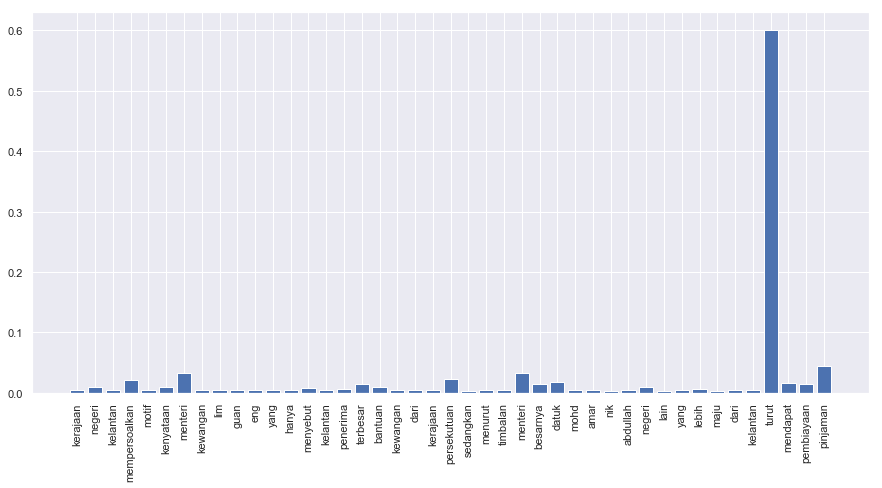

In [8]:
model = malaya.subjective.deep_model('bahdanau')
result = model.predict(negative_text)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()

#### Visualizing luong model

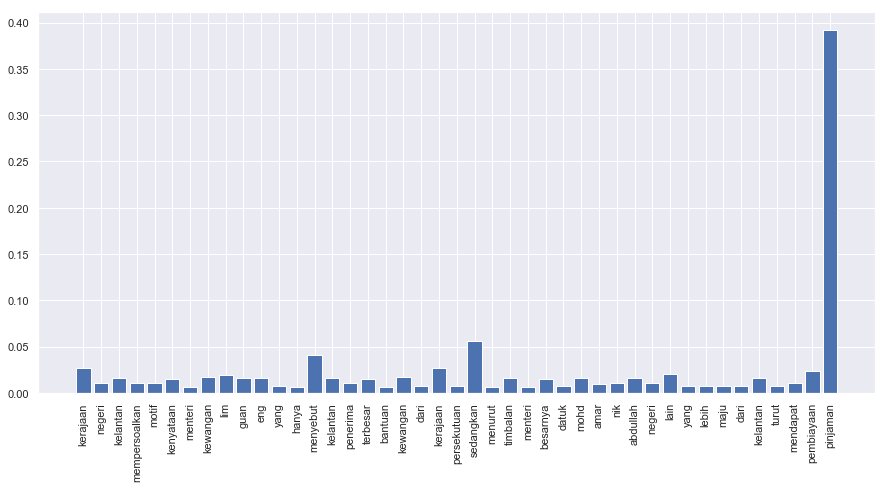

In [9]:
model = malaya.subjective.deep_model('luong')
result = model.predict(negative_text)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()

#### Visualizing hierarchical model

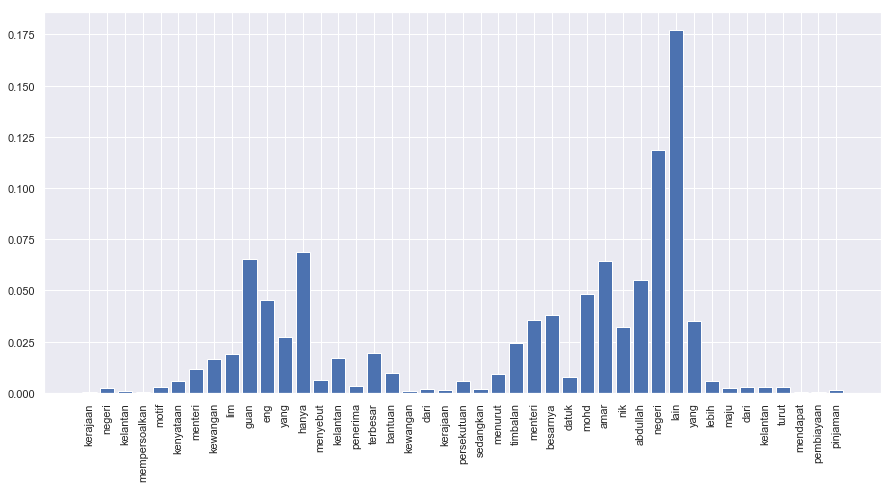

In [10]:
model = malaya.subjective.deep_model('hierarchical')
result = model.predict(negative_text)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()